# 1. Univariate Linear Regression

In [1]:
using BayesianInference

# Setup device------------------------------------------------
m = importBI(platform="cpu")

# Import Data & Data Manipulation ------------------------------------------------
# Import
data_path = m.load.howell1(only_path = true)
m.data(data_path, sep=';') 
m.df = m.df[m.df.age > 18] # Subset data to adults
m.scale(["weight"]) # Normalize

# Define model ------------------------------------------------
@BI function model(weight, height)
    # Priors
    a = m.dist.normal(178, 20, name = 'a') 
    b = m.dist.log_normal(0, 1, name = 'b') 
    s = m.dist.uniform(0, 50, name = 's') 
    m.dist.normal(a + b * weight , s, obs = height) 
end

# Run mcmc ------------------------------------------------
m.fit(model)  # Optimize model parameters through MCMC sampling

# Summary ------------------------------------------------
m.summary() # Get posterior distributions


SYSTEM: caught exception of type :MethodError while trying to print a failed Task notice; giving up

SYSTEM: caught exception of type :MethodError while trying to print a failed Task notice; giving up


jax.local_device_count 32


sample: 100%|██████████| 1000/1000 [00:00<00:00, 1233.36it/s, 7 steps of size 7.35e-01. acc. prob=0.93]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)


Python:
     mean    sd  hdi_5.5%  hdi_94.5%  ...  mcse_sd  ess_bulk  ess_tail  r_hat
a  154.64  0.26    154.27     155.14  ...     0.01    421.95    407.54    NaN
b    5.82  0.29      5.40       6.31  ...     0.01    376.14    356.33    NaN
s    5.15  0.20      4.81       5.47  ...     0.01    446.91    333.97    NaN

[3 rows x 9 columns]

# 2. Multiple continuous Variables

In [2]:
using BayesianInference

# Setup device------------------------------------------------
m = importBI(platform="cpu")

# Import Data & Data Manipulation ------------------------------------------------
# Import
data_path = m.load.howell1(only_path = true)
m.data(data_path, sep=';') 
m.df = m.df[m.df.age > 18] # Subset data to adults
m.scale(["weight", "age"]) # Normalize

# Define model ------------------------------------------------
@BI function model(height, weight, age)
    # Parameter prior distributions
    alpha = m.dist.normal(0, 0.5, name = "alpha")    
    beta1 = m.dist.normal(0, 0.5, name = "beta1")
    beta2 = m.dist.normal(0, 0.5, name = "beta2")
    sigma = m.dist.uniform(0, 50, name = "sigma")
    # Likelihood
    m.dist.normal(alpha + beta1 * weight + beta2 * age, sigma, obs = height)
end

# Run mcmc ------------------------------------------------
m.fit(model)  # Optimize model parameters through MCMC sampling

# Summary ------------------------------------------------
m.summary() # Get posterior distributions

jax.local_device_count 32


sample: 100%|██████████| 1000/1000 [00:00<00:00, 1232.38it/s, 7 steps of size 5.54e-01. acc. prob=0.94]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)


Python:
        mean    sd  hdi_5.5%  hdi_94.5%  ...  mcse_sd  ess_bulk  ess_tail  r_hat
alpha   5.18  0.49      4.32       5.93  ...     0.02    394.70    277.21    NaN
beta1   0.21  0.51     -0.57       0.99  ...     0.03    577.00    264.99    NaN
beta2  -0.05  0.51     -0.93       0.72  ...     0.02    556.73    438.95    NaN
sigma  49.98  0.02     49.96      50.00  ...     0.00    437.37    227.58    NaN

[4 rows x 9 columns]

# 3. Interaction between continuous variables

In [3]:
using BayesianInference

# Setup device------------------------------------------------
m = importBI(platform="cpu")

# Import Data & Data Manipulation ------------------------------------------------
# Import
data_path = m.load.tulips(only_path = true)
m.data(data_path, sep=';')
m.scale(["blooms", "water", "shade"]) # Normalize
# Define model ------------------------------------------------
@BI function model(blooms,shade, water)
    sigma = m.dist.exponential(1, name = "sigma", shape = (1,))
    bws = m.dist.normal(0, 0.25, name = "bws", shape = (1,))
    bs = m.dist.normal(0, 0.25, name = "bs", shape = (1,))
    bw = m.dist.normal(0, 0.25, name = "bw", shape = (1,))
    a = m.dist.normal(0.5, 0.25, name = "a", shape = (1,))
    mu = a + bw*water + bs*shade + bws*water*shade
    m.dist.normal(mu, sigma, obs=blooms)
end

# Run mcmc ------------------------------------------------
m.fit(model)  # Optimize model parameters through MCMC sampling

# Summary ------------------------------------------------
m.summary() # Get posterior distributions

jax.local_device_count 32


sample: 100%|██████████| 1000/1000 [00:00<00:00, 1272.44it/s, 7 steps of size 5.97e-01. acc. prob=0.92]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)


Python:
          mean    sd  hdi_5.5%  hdi_94.5%  ...  mcse_sd  ess_bulk  ess_tail  r_…
a[0]      0.09  0.10     -0.08       0.23  ...     0.01    433.59    227.87    …
bs[0]    -0.31  0.11     -0.47      -0.14  ...     0.01    435.69    295.24    …
bw[0]     0.57  0.11      0.38       0.71  ...     0.00    474.53    316.63    …
bws[0]   -0.32  0.11     -0.50      -0.14  ...     0.01    527.43    387.68    …
sigma[0]  0.57  0.09      0.43       0.70  ...     0.00    402.35    398.08    …

[5 rows x 9 columns]

# 4. Categorical variable

In [4]:
using BayesianInference

# Setup device------------------------------------------------
m = importBI(platform="cpu")

# Import Data & Data Manipulation ------------------------------------------------
# Import
data_path = m.load.milk(only_path = true)
m.data(data_path, sep=';')
m.index("clade") # Convert clade names into index
m.scale(["kcal_per_g"]) # Scale

# Define model ------------------------------------------------
@BI function model(kcal_per_g, index_clade, mass)
    a = m.dist.normal(0, 0.5, shape=(4,), name = "a") # shape based on the number of clades
    b = m.dist.normal(0, 0.5, shape=(4,), name = "b")
    s = m.dist.exponential( 1, name = 's')    
    mu = a[index_clade]+b[index_clade]*mass
    m.dist.normal(mu, s, obs=kcal_per_g)
end

# Run mcmc ------------------------------------------------
m.fit(model)  # Optimize model parameters through MCMC sampling

# Summary ------------------------------------------------
m.summary() # Get posterior distributions

jax.local_device_count 32


sample: 100%|██████████| 1000/1000 [00:00<00:00, 1070.42it/s, 15 steps of size 3.70e-01. acc. prob=0.92]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)


Python:
      mean    sd  hdi_5.5%  hdi_94.5%  ...  mcse_sd  ess_bulk  ess_tail  r_hat
a[0] -0.31  0.35     -0.85       0.25  ...     0.01    474.93    424.32    NaN
a[1]  0.59  0.28      0.09       1.00  ...     0.02    243.60    243.39    NaN
a[2]  0.32  0.37     -0.24       0.94  ...     0.01    451.56    371.25    NaN
a[3] -0.18  0.45     -0.95       0.54  ...     0.02    373.27    299.02    NaN
b[0] -0.00  0.01     -0.02       0.01  ...     0.00    454.86    349.78    NaN
b[1] -0.17  0.13     -0.35       0.05  ...     0.01    268.98    199.26    NaN
b[2]  0.08  0.06     -0.03       0.17  ...     0.00    378.01    418.70    NaN
b[3] -0.26  0.25     -0.68       0.14  ...     0.01    329.66    236.06    NaN
s     0.79  0.13      0.60       0.95  ...     0.01    316.99    297.75    NaN

[9 rows x 9 columns]

# 5. Binomial model

In [5]:
using BayesianInference

# Setup device------------------------------------------------
m = importBI(platform="cpu")

# Import Data & Data Manipulation ------------------------------------------------
# Import
data_path = m.load.chimpanzees(only_path = true)
m.data(data_path, sep=';')

# Define model ------------------------------------------------
@BI function model(pulled_left)
    a = m.dist.normal( 0, 10, shape=(1,), name = "a")
    m.dist.binomial(total_count = 1, logits=a[0], obs=pulled_left)
end

# Run mcmc ------------------------------------------------
m.fit(model)  # Optimize model parameters through MCMC sampling

# Summary ------------------------------------------------
m.summary() # Get posterior distributions

jax.local_device_count 32


sample: 100%|██████████| 1000/1000 [00:00<00:00, 1606.56it/s, 3 steps of size 1.10e+00. acc. prob=0.93]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)


Python:
      mean    sd  hdi_5.5%  hdi_94.5%  ...  mcse_sd  ess_bulk  ess_tail  r_hat
a[0]  0.33  0.09       0.2       0.47  ...      0.0    167.72    173.42    NaN

[1 rows x 9 columns]

# 6. Beta-Binomial model

In [6]:
using BayesianInference

# Setup device------------------------------------------------
m = importBI(platform="cpu")

# Import Data & Data Manipulation ------------------------------------------------
# Import
data_path = m.load.ucbadmit(only_path = true)
m.data(data_path, sep=';')

m.df["gid"] = m.df["applicant.gender"].ne("male").astype("int")

# Define model ------------------------------------------------
@BI function model(gid, applications, admit)
    # Prior for overall concentration scaling (positive, via exponential)
    phi = m.dist.exponential(1, name="phi")
    
    # Priors for group-level intercepts (two groups, normal-distributed)
    alpha = m.dist.normal(0., 1.5, shape=(2,), name="alpha")
    
    # Shifted concentration scale (avoids too small values)
    theta = phi + 2
    
    # Group-specific mean success probability (mapped to [0,1] with sigmoid)
    pbar = m.link.inv_logit(alpha[gid])
    
    # Beta distribution parameter for "successes"
    concentration1 = pbar * theta
    
    # Beta distribution parameter for "failures"
    concentration0 = (1 - pbar) * theta
    
    # Likelihood: admissions modeled with Beta-Binomial
    m.dist.beta_binomial(
        total_count=applications,
        concentration1=concentration1,
        concentration0=concentration0,
        obs=admit
    )
end

# Run mcmc ------------------------------------------------
m.fit(model)  # Optimize model parameters through MCMC sampling

# Summary ------------------------------------------------
m.summary() # Get posterior distributions

jax.local_device_count 32


sample: 100%|██████████| 1000/1000 [00:00<00:00, 1030.25it/s, 7 steps of size 5.81e-01. acc. prob=0.92]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)


Python:
          mean    sd  hdi_5.5%  hdi_94.5%  ...  mcse_sd  ess_bulk  ess_tail  r_…
alpha[0] -0.46  0.42     -1.19       0.14  ...     0.03    386.31    270.66    …
alpha[1] -0.31  0.44     -1.02       0.34  ...     0.02    456.80    360.97    …
phi       0.94  0.76      0.00       1.99  ...     0.03    232.37    170.82    …

[3 rows x 9 columns]

# 7. Poisson model

In [7]:
using BayesianInference

# Setup device------------------------------------------------
m = importBI(platform="cpu")

# Import Data & Data Manipulation ------------------------------------------------
# Import
data_path = m.load.kline(only_path = true)
m.data(data_path, sep=';')
m.scale(["population"]) # Normalize
m.df["cid"] = m.df.contact.eq("high").astype("int")

# Define model ------------------------------------------------
@BI function model(cid, population, total_tools)
    a = m.dist.normal(3, 0.5, shape= (2,), name="a")
    b = m.dist.normal(0, 0.2, shape=(2,), name="b")
    l = jnp.exp(a[cid] + b[cid]*population)
    m.dist.poisson(l, obs=total_tools)
end

# Run mcmc ------------------------------------------------
m.fit(model)  # Optimize model parameters through MCMC sampling

# Summary ------------------------------------------------
m.summary() # Get posterior distributions

jax.local_device_count 32


sample: 100%|██████████| 1000/1000 [00:00<00:00, 1556.96it/s, 7 steps of size 6.43e-01. acc. prob=0.88]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)


Python:
      mean    sd  hdi_5.5%  hdi_94.5%  ...  mcse_sd  ess_bulk  ess_tail  r_hat
a[0]  3.22  0.09      3.06       3.34  ...     0.00    420.46    351.50    NaN
a[1]  3.64  0.09      3.48       3.77  ...     0.00    227.84    242.80    NaN
b[0]  0.35  0.05      0.27       0.43  ...     0.00    429.98    230.63    NaN
b[1]  0.05  0.18     -0.25       0.34  ...     0.01    365.30    221.96    NaN

[4 rows x 9 columns]

# 8. Gamma-Poisson model

In [8]:
using BayesianInference

# Setup device------------------------------------------------
m = importBI(platform="cpu")

# Import Data & Data Manipulation ------------------------------------------------
# Import
data_path = m.load.sim_gamma_poisson(only_path = true)
m.data(data_path, sep=',')

# Define model ------------------------------------------------
@BI function model(log_days, monastery, y)
    a = m.dist.normal(0, 1, name = "a", shape=(1,))
    b = m.dist.normal(0, 1, name = "b", shape=(1,))
    phi = m.dist.exponential(1, name = "phi", shape=(1,))
    mu = jnp.exp(log_days + a + b * monastery)
    Lambda =  m.dist.gamma(rate = mu*phi, concentration = phi, name = "Lambda")
    m.dist.poisson(rate = Lambda, obs=y)
end

# Run mcmc ------------------------------------------------
m.fit(model)  # Optimize model parameters through MCMC sampling

# Summary ------------------------------------------------
m.summary() # Get posterior distributions

jax.local_device_count 32


sample: 100%|██████████| 1000/1000 [00:05<00:00, 183.71it/s, 31 steps of size 1.05e-01. acc. prob=0.91]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)


Python:
               mean    sd  hdi_5.5%  ...  ess_bulk  ess_tail  r_hat
Lambda[0]      1.58  0.35      1.09  ...    637.16    428.01    NaN
Lambda[1]      1.50  0.36      0.92  ...    604.37    313.75    NaN
Lambda[2]      1.55  0.34      0.99  ...    712.46    429.17    NaN
Lambda[3]      1.42  0.34      0.89  ...    757.41    343.08    NaN
Lambda[4]      1.47  0.35      0.91  ...    560.18    432.92    NaN
...             ...   ...       ...  ...       ...       ...    ...
Lambda[3398]   3.56  0.78      2.32  ...    731.58    294.77    NaN
Lambda[3399]   3.74  0.75      2.62  ...    597.26    354.34    NaN
a[0]          -0.42  0.01     -0.45  ...     56.51    127.82    NaN
b[0]          -2.76  0.03     -2.81  ...     61.40    124.34    NaN
phi[0]        18.83  1.99     15.05  ...     13.17     47.39    NaN

[3403 rows x 9 columns]

# 9. Categorical model

In [9]:
using BayesianInference

# Setup device------------------------------------------------
m = importBI(platform="cpu")

# Import Data & Data Manipulation ------------------------------------------------
# Import
data_path = m.load.sim_multinomial(only_path = true)
m.data(data_path, sep=',')

# Define model ------------------------------------------------
@BI function model(career, income)
    a = m.dist.normal(0, 1, shape=(2,), name = "a")
    b = m.dist.half_normal(0.5, shape=(1,), name = "b")
    
    # indexing works now because of the package update
    s_1 = a[0] + b * income[0]
    s_2 = a[1] + b * income[1]
    
    # ⚠️  Use jnp.array to create a Python object, so [0] indexing works
    s_3 = jnp.array([0.0]) 
    
    # Now s_3[0] is valid because it calls Python's __getitem__(0)
    p = jax.nn.softmax(jnp.stack([s_1[0], s_2[0], s_3[0]]))
    
    m.dist.categorical(probs=p, obs=career)
end

# Run mcmc ------------------------------------------------
m.fit(model)  # Optimize model parameters through MCMC sampling

# Summary ------------------------------------------------
m.summary() # Get posterior distributions

jax.local_device_count 32


sample: 100%|██████████| 1000/1000 [00:00<00:00, 1234.95it/s, 7 steps of size 2.58e-01. acc. prob=0.85]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)


Python:
      mean    sd  hdi_5.5%  hdi_94.5%  ...  mcse_sd  ess_bulk  ess_tail  r_hat
a[0] -2.06  0.24     -2.41      -1.70  ...     0.03     35.81     22.00    NaN
a[1] -1.55  0.15     -1.80      -1.33  ...     0.02     39.00     22.56    NaN
b[0]  0.05  0.04      0.00       0.10  ...     0.01     30.02     39.34    NaN

[3 rows x 9 columns]

# 10. Multinomial model

In [10]:
using BayesianInference

# Setup device------------------------------------------------
m = importBI(platform="cpu")

# Import Data & Data Manipulation ------------------------------------------------
# Import
data_path = m.load.sim_multinomial(only_path = true)
m.data(data_path, sep=',')

# Define model ------------------------------------------------
@BI function model(income, career)
    # Parameter prior distributions
    alpha = m.dist.normal(0, 1, shape=(2,), name='a')
    beta = m.dist.half_normal(0.5, shape=(1,), name='b')
    s_1 = alpha[0] + beta * income[0]
    s_2 = alpha[1] + beta * income[1]
    # ⚠️  Use jnp.array to create a Python object, so [0] indexing works
    s_3 = jnp.array([0.0]) 
    p = jnp.exp(jnp.stack([s_1[0], s_2[0], s_3[0]]))
    # Likelihood
    m.dist.multinomial(probs = p[career], obs=career)
end

# Run mcmc ------------------------------------------------
m.fit(model)  # Optimize model parameters through MCMC sampling

# Summary ------------------------------------------------
m.summary() # Get posterior distributions

jax.local_device_count 32


sample: 100%|██████████| 1000/1000 [00:00<00:00, 1119.55it/s, 7 steps of size 7.96e-01. acc. prob=0.90]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)


Python:
       mean    sd  hdi_5.5%  hdi_94.5%  ...  mcse_sd  ess_bulk  ess_tail  r_hat
a[0]   0.00  0.97     -1.60       1.51  ...     0.04    428.89    395.09    NaN
a[1]  82.06  1.02     80.40      83.58  ...     0.05    472.75    340.24    NaN
b[0]  40.96  0.50     40.12      41.65  ...     0.02    616.30    368.44    NaN

[3 rows x 9 columns]

# 11. Zero-Inflated Models

In [11]:
using BayesianInference

# Setup device------------------------------------------------
m = importBI(platform="cpu", rand_seed = false)

# Simulated data ------------------------------------------------
prob_drink = 0.2  
rate_work = 1     

# Sample one year of production
N = 365

# Note: Use lowercase 'true' for booleans in Julia
# 'drink' will be a Python/JAX object
drink = m.dist.binomial(1, prob_drink, shape=(N,), sample=true)

# Math works automatically because 'drink' is a Py object 
# and we taught Julia how to handle Py arithmetic in the previous step
y = (1 - drink) * m.dist.poisson(rate_work, shape=(N,), sample=true)

# Send data to BI class object ------------------------------------------------
m.data_on_model = pydict(Dict("y" =>y))


# Define model ------------------------------------------------
@BI function model(y)
    al = m.dist.normal(1, 0.5, name="al")
    ap = m.dist.normal(-1.5, 1, name="ap")
    p = m.link.inv_logit(ap)
    lambda_ = jnp.exp(al)
    m.dist.zero_inflated_poisson(p, lambda_, obs=y)
end

# Run mcmc ------------------------------------------------
m.fit(model)  # Optimize model parameters through MCMC sampling

# Summary ------------------------------------------------
m.summary() # Get posterior distributions

jax.local_device_count 32


sample: 100%|██████████| 1000/1000 [00:00<00:00, 1241.50it/s, 3 steps of size 6.76e-01. acc. prob=0.89]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)


Python:
    mean    sd  hdi_5.5%  hdi_94.5%  ...  mcse_sd  ess_bulk  ess_tail  r_hat
al  0.15  0.09      0.03       0.30  ...     0.00    185.00    264.67    NaN
ap -0.74  0.23     -1.08      -0.34  ...     0.01    179.56    283.56    NaN

[2 rows x 9 columns]

# 13. Varying intercepts

In [12]:
using BayesianInference

# Setup device------------------------------------------------
m = importBI(platform="cpu")

# Import Data & Data Manipulation ------------------------------------------------
# Import
data_path = m.load.reedfrogs(only_path = true)
m.data(data_path, sep=';')
m.df["tank"] = jnp.arange(m.df.shape[0]) 

# Define model ------------------------------------------------
@BI function model(tank, surv, density)
    alpha = m.effects.varying_intercept(N_groups=48,group_id=tank, group_name = "tank")
    m.dist.binomial(total_count = density, logits = alpha, obs=surv)
end

# Run mcmc ------------------------------------------------
m.fit(model)  # Optimize model parameters through MCMC sampling

# Summary ------------------------------------------------
m.summary() # Get posterior distributions

jax.local_device_count 32


sample: 100%|██████████| 1000/1000 [00:00<00:00, 1060.33it/s, 15 steps of size 4.47e-01. acc. prob=0.88]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)


Python:
                       mean    sd  hdi_5.5%  ...  ess_bulk  ess_tail  r_hat
global_intercept_tank  1.37  0.26      0.99  ...    427.18    312.09    NaN
intercept_tank[0]      2.13  0.84      0.71  ...    780.53    349.45    NaN
intercept_tank[1]      3.03  1.04      1.31  ...    649.71    273.44    NaN
intercept_tank[2]      1.03  0.69     -0.10  ...    691.71    327.00    NaN
intercept_tank[3]      3.11  1.13      1.12  ...    454.87     87.92    NaN
intercept_tank[4]      2.18  0.91      0.79  ...    890.66    265.58    NaN
intercept_tank[5]      2.14  0.92      0.63  ...    740.16    330.41    NaN
intercept_tank[6]      3.10  1.08      1.36  ...    552.45    311.32    NaN
intercept_tank[7]      2.22  0.86      0.79  ...    669.33    374.11    NaN
                           ... 34 more lines ...
intercept_tank[42]    -0.44  0.38     -1.02  ...    748.32    472.24    NaN
intercept_tank[43]    -0.33  0.36     -0.84  ...    615.14    333.30    NaN
intercept_tank[44]     0.58  0.

# 14. Varying slopes

In [13]:
using BayesianInference

# Setup device------------------------------------------------
m = importBI(platform="cpu")

# Import Data & Data Manipulation ------------------------------------------------
# Import
data_path = m.load.sim_multivariate_normal(only_path = true)

m.data(data_path, sep=',') 
m.data_on_model = pybuiltins.dict(
    cafe = jnp.array(m.df.cafe.values, dtype=jnp.int32),
    wait = jnp.array(m.df.wait.values, dtype=jnp.float32),
    N_cafes = length(m.df.cafe.unique()),    
    afternoon = jnp.array(m.df.afternoon.values, dtype=jnp.float32)
)


# Define model ------------------------------------------------
@BI function model(cafe, wait, N_cafes, afternoon)
    a = m.dist.normal(5, 2,  name = "a")
    b = m.dist.normal(-1, 0.5, name = "b")
    sigma_cafe = m.dist.exponential(1, shape=(2,),  name = "sigma_cafe")
    sigma = m.dist.exponential( 1,  name = "sigma")
    Rho = m.dist.lkj(2, 2, name = "Rho")
    cov = jnp.outer(sigma_cafe, sigma_cafe) * Rho
    a_cafe_b_cafe = m.dist.multivariate_normal(jnp.stack([a, b]), cov, shape = [N_cafes], name = "a_b_cafe")    

    a_cafe, b_cafe = a_cafe_b_cafe[:, 0], a_cafe_b_cafe[:, 1]
    mu = a_cafe[cafe] + b_cafe[cafe] * afternoon
    m.dist.normal(mu, sigma, obs=wait)

end

# Run mcmc ------------------------------------------------
m.fit(model)  # Optimize model parameters through MCMC sampling

# Summary ------------------------------------------------
m.summary() # Get posterior distributions

jax.local_device_count 32


sample: 100%|██████████| 1000/1000 [00:01<00:00, 550.60it/s, 15 steps of size 3.33e-01. acc. prob=0.86]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
/home/sosa/.local/lib/python3.13/site-packages/arviz/stats/diagnostics.py:991: RuntimeWarning: invalid value encountered in scalar divide
  varsd = varvar / evar / 4


Python:
                 mean    sd  hdi_5.5%  ...  ess_bulk  ess_tail  r_hat
Rho[0, 0]        1.00  0.00      1.00  ...    500.00    500.00    NaN
Rho[0, 1]       -0.48  0.19     -0.79  ...    587.35    431.49    NaN
Rho[1, 0]       -0.48  0.19     -0.79  ...    587.35    431.49    NaN
Rho[1, 1]        1.00  0.00      1.00  ...    586.65    498.98    NaN
a                3.53  0.21      3.16  ...    743.39    405.09    NaN
a_b_cafe[0, 0]   3.55  0.22      3.23  ...    683.67    438.95    NaN
a_b_cafe[0, 1]  -1.55  0.29     -1.94  ...    659.63    369.89    NaN
a_b_cafe[1, 0]   5.32  0.23      4.93  ...    624.03    330.86    NaN
a_b_cafe[1, 1]  -1.38  0.32     -1.90  ...    660.76    331.24    NaN
                        ... 33 more lines ...
a_b_cafe[18, 1] -0.18  0.28     -0.66  ...    485.75    332.96    NaN
a_b_cafe[19, 0]  2.82  0.21      2.50  ...    605.83    237.28    NaN
a_b_cafe[19, 1] -0.57  0.28     -0.98  ...    658.02    314.77    NaN
b               -1.09  0.16     -1.3

# 15. Gaussian processes

In [14]:
using BayesianInference

# Setup device------------------------------------------------
m = importBI(platform="cpu")

# Import Data & Data Manipulation ------------------------------------------------
# Import
data_path = m.load.kline2(only_path = true)
m.data(data_path, sep=";") 

islandsDistMatrix = m.load.islands_dist_matrix(frame = false)["data"]
m.data_to_model(["total_tools", "population"])
m.data_on_model["society"] = jnp.arange(0,10)# index observations
m.data_on_model["Dmat"] = jnp.array(islandsDistMatrix) # Distance matrix



# Define model ------------------------------------------------
@BI function model(Dmat, population, society, total_tools)
    a = m.dist.exponential(1, name = "a")
    b = m.dist.exponential(1, name = "b")
    g = m.dist.exponential(1, name = "g")

    # non-centered Gaussian Process prior
    etasq = m.dist.exponential(2, name = "etasq")
    rhosq = m.dist.exponential(0.5, name = "rhosq")
    SIGMA = etasq * jnp.exp(-rhosq * jnp.square(Dmat))
    SIGMA = SIGMA.at[jnp.diag_indices(Dmat.shape[0])].add(etasq)
    k = m.dist.multivariate_normal(0, SIGMA, name = "k")

    lambda_ = a * population^b / g * jnp.exp(k[society])

    m.dist.poisson(lambda_, obs=total_tools)

end

# Run mcmc ------------------------------------------------
m.fit(model)  # Optimize model parameters through MCMC sampling

# Summary ------------------------------------------------
m.summary() # Get posterior distributions

PythonCall.PyException: Python: Julia: MethodError: no method matching -(::BayesianInference.BIObject)
The function `-` exists, but no method is defined for this combination of argument types.

Closest candidates are:
  -(::BayesianInference.BIObject, !Matched::BayesianInference.BIObject)
   @ BayesianInference ~/work/BI/BIJ/src/BayesianInference.jl:123
  -(::BayesianInference.BIObject, !Matched::PythonCall.Py)
   @ BayesianInference ~/work/BI/BIJ/src/BayesianInference.jl:127
  -(::BayesianInference.BIObject, !Matched::Number)
   @ BayesianInference ~/work/BI/BIJ/src/BayesianInference.jl:124
  ...


# 16.Measurement error

In [15]:
using BayesianInference

# Setup device------------------------------------------------
m = importBI(platform="cpu")

# Import Data & Data Manipulation ------------------------------------------------
# Import
data_path = m.load.WaffleDivorce(only_path=true)
m.data(data_path, sep=";") 
m.scale(["MedianAgeMarriage", "Marriage"]) # Scale
dat = pydict(
    D_obs = m.z_score(m.df["Divorce"].values),   
    D_sd = jnp.array(m.df["Divorce SE"].values / m.df["Divorce"].std()), 
    A = jnp.array(m.df["MedianAgeMarriage"].values), 
    M = jnp.array(m.df["Marriage"].values),
    N = m.df.shape[0]   
)
m.data_on_model = dat # Send to model (convert to jax array)

# Define model ------------------------------------------------
@BI function model(D_obs, D_sd, A, N, M)
    a = m.dist.normal(0, 0.2, name = "a") 
    beta = m.dist.normal(0, 0.5, name = "beta")
    eta = m.dist.normal(0, 0.5, name = "eta")  
    s = m.dist.exponential(1, name = "s") 
    mu = a + beta * A + eta * M
    D_true = m.dist.normal(mu, s, name = "D_true") 
    m.dist.normal(D_true , D_sd, obs = D_obs) 


end

# Run mcmc ------------------------------------------------
m.fit(model)  # Optimize model parameters through MCMC sampling

# Summary ------------------------------------------------
m.summary() # Get posterior distributions

jax.local_device_count 32
jax.local_device_count 32


sample: 100%|██████████| 1000/1000 [00:01<00:00, 896.24it/s, 15 steps of size 2.85e-01. acc. prob=0.92]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)


Python:
            mean    sd  hdi_5.5%  hdi_94.5%  ...  mcse_sd  ess_bulk  ess_tail  …
D_true[0]   1.20  0.35      0.76       1.86  ...     0.02    713.28    321.17  …
D_true[1]   0.71  0.55     -0.15       1.52  ...     0.04    931.62    112.92  …
D_true[2]   0.46  0.32     -0.03       0.98  ...     0.01    935.92    291.34  …
D_true[3]   1.43  0.48      0.65       2.08  ...     0.03    841.58    395.53  …
D_true[4]  -0.91  0.14     -1.13      -0.69  ...     0.01   1165.79    239.92  …
D_true[5]   0.66  0.41     -0.03       1.32  ...     0.02   1193.16    340.50  …
D_true[6]  -1.40  0.37     -1.90      -0.74  ...     0.02   1072.11    371.34  …
D_true[7]  -0.35  0.50     -1.15       0.38  ...     0.02   1349.49    405.09  …
D_true[8]  -1.90  0.62     -3.00      -1.09  ...     0.02    583.83    458.28  …
                             ... 38 more lines ...
D_true[47]  0.59  0.49     -0.14       1.37  ...     0.03   1277.33    267.62  …
D_true[48] -0.64  0.29     -1.08      -0.18  ...  

# 17. Missing data (wip)

# 18. Latent variable (wip)

# 19. PCA

In [16]:
using BayesianInference

# ----------------------------------------------------
#  ⚠️ Forcing Matplotlib to use the "Inline" backend
using PythonCall
mpl = pyimport("matplotlib.pyplot")

# ----------------------------------------------------

m = importBI(platform="cpu")
data_path = m.load.iris(only_path=true)
m.data(data_path)
m.data_on_model = pydict(
    X=jnp.array(m.df.iloc[:,1:4].values)
)
m.fit(m.models.pca(type="classic"))


PythonCall.PyException: Python: AttributeError: 'load' object has no attribute 'iris'

In [17]:
@pyplot m.models.pca.plot(
    X = m.df.iloc[:,1:4].values,
    y = m.df.iloc[:,5].values, 
    feature_names = m.df.columns[1:4], 
    target_names = m.df.iloc[:,6].unique(),
    color_var = m.df.iloc[:,1].values
)


PythonCall.PyException: Python: AttributeError: 'bi' object has no attribute 'df'

# 20. GMM

In [18]:
using BayesianInference
using PythonCall
m = importBI()
# 1. Generate Data
sk_datasets = pyimport("sklearn.datasets")
output = sk_datasets.make_blobs(
    n_samples=500, 
    centers=8, 
    cluster_std=0.8,
    center_box=(-10, 10), 
    random_state=101
)
data = output[0] # Features
true_labels = output[1]
m.ml.KMEANS(data, n_clusters=8)
m.data_on_model = pydict(data=data, K=8, initial_means = m.ml.results["centroids"])


@BI function gmm(data, K, initial_means)
    D = data.shape[1] 
    alpha_prior = 0.5 * jnp.ones(K)
    w = m.dist.dirichlet(concentration=alpha_prior, name="weights") 

    # We capture the output of the pywith block
    # The block returns a tuple (mu, scale_tril)
    mu, scale_tril = pywith(m.dist.plate("components", K)) do _
        mu_inner = m.dist.multivariate_normal(
            loc=initial_means, 
            covariance_matrix=0.1*jnp.eye(D), 
            name="mu"
        )        
        
        sigma = m.dist.half_cauchy(1, shape=(D,), event=1, name="sigma")
        Lcorr = m.dist.lkj_cholesky(dimension=D, concentration=1.0, name="Lcorr")

        # FIX: Use expand_dims instead of slicing
        scale_tril_inner = jnp.expand_dims(sigma, -1) * Lcorr
        
        # Return them so they are available outside
        (mu_inner, scale_tril_inner)
    end

    m.dist.mixture_same_family(
        mixing_distribution=m.dist.categorical(probs=w, create_obj=true),
        component_distribution=m.dist.multivariate_normal(loc=mu, scale_tril=scale_tril, create_obj=true),
        name="obs",
        obs=data
    )
end

# Run
m.fit(gmm)
m.summary()

jax.local_device_count 32
jax.local_device_count 32


sample: 100%|██████████| 1000/1000 [00:02<00:00, 370.93it/s, 15 steps of size 4.19e-01. acc. prob=0.88]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
/home/sosa/.local/lib/python3.13/site-packages/arviz/stats/diagnostics.py:991: RuntimeWarning: invalid value encountered in scalar divide
  varsd = varvar / evar / 4
/home/sosa/.local/lib/python3.13/site-packages/arviz/stats/diagnostics.py:991: RuntimeWarning: invalid value encountered in scalar divide
  varsd = varvar / evar / 4
/home/sosa/.local/lib/python3.13/site-packages/arviz/stats/diagnostics.py:991: RuntimeWarning: invalid value encountered in scalar divide
  varsd = varvar / evar / 4
/home/sosa/.local/lib/python3.13/site-packages/arviz/stats/diagnostics.py:991: RuntimeWarning: invalid value encountered in scalar divide
  varsd = varvar / evar / 4
/home/sosa/.local/lib/python3.13/site-packages/arviz/stats/diagnostics.py:991: RuntimeWarning: invalid value encountered in scalar 

Python:
                mean    sd  hdi_5.5%  ...  ess_bulk  ess_tail  r_hat
Lcorr[0, 0, 0]  1.00  0.00      1.00  ...    500.00    500.00    NaN
Lcorr[0, 0, 1]  0.00  0.00      0.00  ...    500.00    500.00    NaN
Lcorr[0, 1, 0]  0.04  0.15     -0.21  ...    388.11    302.78    NaN
Lcorr[0, 1, 1]  0.99  0.02      0.97  ...    424.58    354.66    NaN
Lcorr[1, 0, 0]  1.00  0.00      1.00  ...    500.00    500.00    NaN
...              ...   ...       ...  ...       ...       ...    ...
weights[3]      0.13  0.02      0.11  ...    504.94    352.38    NaN
weights[4]      0.12  0.01      0.10  ...    261.49    289.30    NaN
weights[5]      0.12  0.01      0.10  ...    691.54    465.41    NaN
weights[6]      0.12  0.02      0.10  ...    662.26    290.26    NaN
weights[7]      0.13  0.02      0.10  ...    402.79    258.43    NaN

[72 rows x 9 columns]

# 21. DPMM

In [19]:
using BayesianInference
using PythonCall
m = importBI()
# 1. Generate Data
sk_datasets = pyimport("sklearn.datasets")
output = sk_datasets.make_blobs(
    n_samples=500, 
    centers=8, 
    cluster_std=0.8,
    center_box=(-10, 10), 
    random_state=101
)
data = output[0] # Features
true_labels = output[1]
m.ml.KMEANS(data, n_clusters=8)
m.data_on_model = pydict(data=data, K=10)

@BI function dpmm(data, K=10)
    N, D = data.shape  # Number of features
    data_mean = jnp.mean(data, axis=0)
    data_std = jnp.std(data, axis=0)*2

    # 1) stick-breaking weights
    alpha = m.dist.gamma(1.0, 10.0,name="alpha")

    beta = pywith(m.dist.plate("beta_plate", K - 1)) do _
        beta = m.dist.beta(1, alpha)
        beta
    end

    w = numpyro.deterministic("w",mix_weights(beta))

    # 2) component parameters
    mu, scale_tril = pywith(m.dist.plate("components", T)) do _
        mu = m.dist.multivariate_normal(loc=data_mean, covariance_matrix=data_std*jnp.eye(D),name="mu")# shape (T, D)        
        sigma = m.dist.log_normal(0.0, 1.0,shape=(D,),event=1,name="sigma")# shape (T, D)
        Lcorr = m.dist.lkj_cholesky(dimension=D, concentration=1.0,name="Lcorr")# shape (T, D, D)

        scale_tril_inner = jnp.expand_dims(sigma, -1) * Lcorr
        (mu_inner, scale_tril_inner)
    
    end

    # 3) Latent cluster assignments for each data point
    pywith(m.dist.plate("data", N)) do _
        # Sample the assignment for each data point
        z = m.dist.categorical(w, name = 'z') # shape (N,)  

        # Sample the data point from the assigned component
        m.dist.multivariate_normal(loc=mu[z], scale_tril=scale_tril[z],
            obs=data, name = "Y"
        )  
    end

m.data_on_model = dict(data=data)
m.fit(dpmm)  # Optimize model parameters through MCMC sampling


Base.Meta.ParseError: ParseError:
# Error @ /home/sosa/work/BI/BIJ/test/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X53sdnNjb2RlLXJlbW90ZQ==.jl:56:64
m.data_on_model = dict(data=data)
m.fit(dpmm)  # Optimize model parameters through MCMC sampling
#                                                             
└ ── Expected `end`

In [20]:
using BayesianInference
using PythonCall
numpyro = pyimport("numpyro")

m = importBI(rand_seed = false)

# 1. Generate Data
sk_datasets = pyimport("sklearn.datasets")
output = sk_datasets.make_blobs(n_samples=500, centers=8, cluster_std=0.8, center_box=(-10, 10), random_state=101)
data = output[0]
data_mean = jnp.mean(data, axis=0)
data_std = jnp.std(data, axis=0) * 2
m.data_on_model = pydict(data=data, K=10, data_mean = data_mean, data_std = data_std)


@BI function dpmm(data, K, data_mean , data_std)
    N, D = data.shape 

    alpha = m.dist.gamma(1.0, 10.0, name="alpha")

    beta = pywith(m.dist.plate("beta_plate", K - 1)) do _
        m.dist.beta(1, alpha, name = "beta")
    end

    w = numpyro.deterministic("w", m.models.dpmm.mix_weights(beta))

    mu, scale_tril = pywith(m.dist.plate("components", K)) do _
        mu_val = m.dist.multivariate_normal(
            loc=data_mean, 
            covariance_matrix=data_std * jnp.eye(D),
            name="mu"
        )
        
        sigma = m.dist.log_normal(0.0, 1.0, shape=(D,), event=1, name="sigma")
        Lcorr = m.dist.lkj_cholesky(dimension=D, concentration=1.0, name="Lcorr")
        scale_tril_inner = jnp.expand_dims(sigma, -1) * Lcorr
        (mu_val, scale_tril_inner)
    end
    
    m.dist.mixture_same_family(
        mixing_distribution=m.dist.categorical(probs=w, create_obj=true),
        component_distribution=m.dist.multivariate_normal(
            loc=mu, 
            scale_tril=scale_tril, 
            create_obj=true
        ),
        obs=data
    )
end

# 4. Run

m.fit(dpmm) 
m.summary()


sample: 100%|██████████| 1000/1000 [00:28<00:00, 34.76it/s, 127 steps of size 2.34e-02. acc. prob=0.92]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
/home/sosa/.local/lib/python3.13/site-packages/arviz/stats/diagnostics.py:991: RuntimeWarning: invalid value encountered in scalar divide
  varsd = varvar / evar / 4
/home/sosa/.local/lib/python3.13/site-packages/arviz/stats/diagnostics.py:991: RuntimeWarning: invalid value encountered in scalar divide
  varsd = varvar / evar / 4
/home/sosa/.local/lib/python3.13/site-packages/arviz/stats/diagnostics.py:991: RuntimeWarning: invalid value encountered in scalar divide
  varsd = varvar / evar / 4
/home/sosa/.local/lib/python3.13/site-packages/arviz/stats/diagnostics.py:991: RuntimeWarning: invalid value encountered in scalar divide
  varsd = varvar / evar / 4
/home/sosa/.local/lib/python3.13/site-packages/arviz/stats/diagnostics.py:991: RuntimeWarning: invalid value encountered in scalar 

jax.local_device_count 32
jax.local_device_count 32


Python:
                mean    sd  hdi_5.5%  ...  ess_bulk  ess_tail  r_hat
Lcorr[0, 0, 0]  1.00  0.00      1.00  ...    500.00    500.00    NaN
Lcorr[0, 0, 1]  0.00  0.00      0.00  ...    500.00    500.00    NaN
Lcorr[0, 1, 0] -0.21  0.13     -0.41  ...    721.37    281.15    NaN
Lcorr[0, 1, 1]  0.97  0.03      0.93  ...    570.00    380.29    NaN
Lcorr[1, 0, 0]  1.00  0.00      1.00  ...    500.00    500.00    NaN
...              ...   ...       ...  ...       ...       ...    ...
w[5]            0.12  0.02      0.10  ...    647.21    259.45    NaN
w[6]            0.03  0.04      0.00  ...     24.32     26.70    NaN
w[7]            0.12  0.02      0.10  ...    778.89    346.12    NaN
w[8]            0.12  0.02      0.10  ...    588.08    461.64    NaN
w[9]            0.11  0.04      0.00  ...      6.01     11.88    NaN

[100 rows x 9 columns]

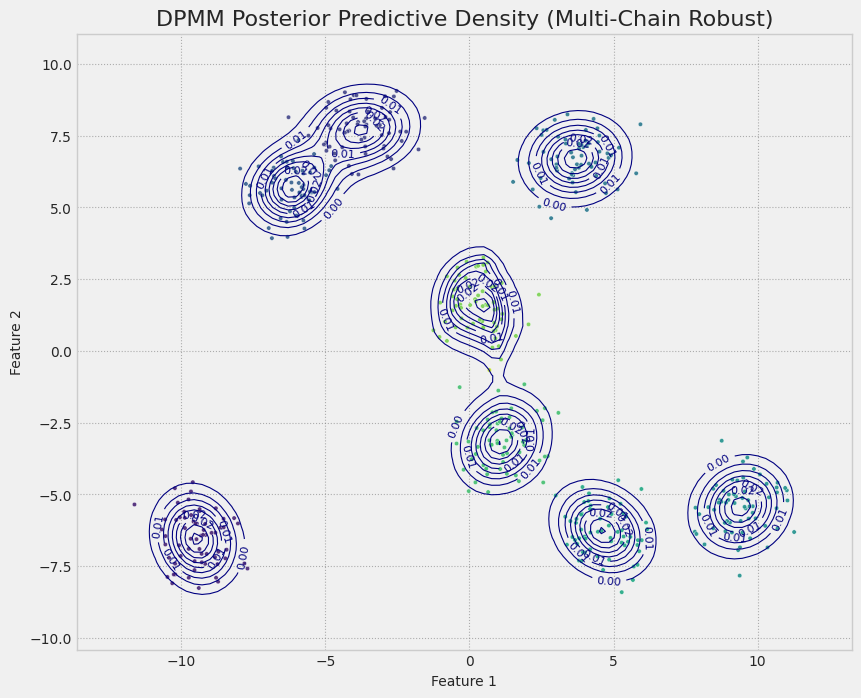

In [21]:
@pyplot m.models.dpmm.plot_dpmm(m.data_on_model["data"], m.sampler)

# 22. Network model

In [25]:
# Setup device------------------------------------------------
using BayesianInference

# Setup device------------------------------------------------
m = importBI(platform="cpu")

# Simulate data ------------------------------------------------
N = 50
individual_predictor = m.dist.normal(0,1, shape = (N,1), sample = true)

kinship = m.dist.bernoulli(0.3, shape = (N,N), sample = true)
kinship = kinship.at[jnp.diag_indices(N)].set(0)

function sim_network(kinship, individual_predictor)
  # Intercept
  alpha = m.dist.normal(0,1, sample = true)

  # SR
  sr = m.net.sender_receiver(individual_predictor, individual_predictor, s_mu = 0.4, r_mu = -0.4, sample = true)

  # D
  DR = m.net.dyadic_effect(kinship, d_sd=2.5, sample = true)

  return m.dist.bernoulli(logits = alpha + sr + DR, sample = true)

end

network = sim_network(m.net.mat_to_edgl(kinship), individual_predictor)


# Predictive model ------------------------------------------------

m.data_on_model = pydict(
    network = network, 
    dyadic_predictors = m.net.mat_to_edgl(kinship),
    focal_individual_predictors = individual_predictor,
    target_individual_predictors = individual_predictor
)


@BI function model(network, dyadic_predictors, focal_individual_predictors, target_individual_predictors)
    N_id = network.shape[0]

    # Block ---------------------------------------
    alpha = m.dist.normal(0,1, name = "alpha")

    ## SR shape =  N individuals---------------------------------------
    sr =  m.net.sender_receiver(
      focal_individual_predictors,
      target_individual_predictors,
      s_mu = 0.4, r_mu = -0.4
    )

    # Dyadic shape = N dyads--------------------------------------  
    dr = m.net.dyadic_effect(dyadic_predictors, d_sd=2.5) # Diadic effect intercept only 

    m.dist.bernoulli(logits = alpha + sr + dr, obs=network)
end

m.fit(model, num_samples = 500, num_warmup = 500, num_chains = 1, thinning = 1)
m.summary()

jax.local_device_count 32


sample: 100%|██████████| 1000/1000 [00:04<00:00, 212.91it/s, 31 steps of size 1.77e-01. acc. prob=0.76]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
/home/sosa/.local/lib/python3.13/site-packages/arviz/stats/diagnostics.py:991: RuntimeWarning: invalid value encountered in scalar divide
  varsd = varvar / evar / 4
/home/sosa/.local/lib/python3.13/site-packages/arviz/stats/diagnostics.py:991: RuntimeWarning: invalid value encountered in scalar divide
  varsd = varvar / evar / 4


Python:
              mean    sd  hdi_5.5%  ...  ess_bulk  ess_tail  r_hat
alpha        -0.63  0.28     -1.02  ...     80.80    157.55    NaN
dr_L[0, 0]    1.00  0.00      1.00  ...    500.00    500.00    NaN
dr_L[0, 1]    0.00  0.00      0.00  ...    500.00    500.00    NaN
dr_L[1, 0]   -0.43  0.22     -0.83  ...     89.42    103.53    NaN
dr_L[1, 1]    0.87  0.12      0.71  ...     93.39    182.90    NaN
...            ...   ...       ...  ...       ...       ...    ...
sr_rf[48, 1] -2.11  0.76     -3.10  ...    159.49     93.42    NaN
sr_rf[49, 0] -0.11  0.42     -0.74  ...    625.40    352.19    NaN
sr_rf[49, 1] -0.08  0.52     -0.89  ...    380.46    278.78    NaN
sr_sigma[0]   0.75  0.17      0.49  ...     26.72     32.90    NaN
sr_sigma[1]   1.53  0.32      1.08  ...     26.74     47.95    NaN

[5115 rows x 9 columns]

# 23. Stochastic Block Models

In [24]:
# Setup device------------------------------------------------
using BayesianInference

# Setup device------------------------------------------------
m = importBI(platform="cpu", rand_seed = false)

# Simulate data ------------------------------------------------
N = 50
individual_predictor = m.dist.normal(0,1, shape = (N,1), sample = true)

kinship = m.dist.bernoulli(0.3, shape = (N,N), sample = true)
kinship = kinship.at[jnp.diag_indices(N)].set(0)

category = m.dist.categorical(jnp.array([.25,.25,.25,.25]), sample = true, shape  = (N,))
N_grp, N_by_grp = jnp.unique(category, return_counts=true)
N_grp = N_grp.shape[0]


function sim_network(kinship, individual_predictor)
  # Intercept
  alpha = m.dist.normal(0,1, sample = true)

  # SR
  sr = m.net.sender_receiver(individual_predictor, individual_predictor, s_mu = 0.4, r_mu = -0.4, sample = true)

  # D
  DR = m.net.dyadic_effect(kinship, d_sd=2.5, sample = true)

  return m.dist.bernoulli(logits = alpha + sr + DR, sample = true)

end

network = sim_network(m.net.mat_to_edgl(kinship), individual_predictor)


# Predictive model ------------------------------------------------

m.data_on_model = pydict(
    network = network, 
    dyadic_predictors = m.net.mat_to_edgl(kinship),
    focal_individual_predictors = individual_predictor,
    target_individual_predictors = individual_predictor, 
    category = category
)


@BI function model(network, dyadic_predictors, focal_individual_predictors, target_individual_predictors,category) 
    N_id = focal_individual_predictors.shape[0]

    # Block ---------------------------------------
    B_intercept = m.net.block_model(jnp.full((N_id,),0), 1, N_id, name = "B_intercept")
    B_category = m.net.block_model(category, N_grp, N_by_grp, name = "B_category")

    ## SR shape =  N individuals---------------------------------------
    sr =  m.net.sender_receiver(
      focal_individual_predictors,
      target_individual_predictors, 
      s_mu = 0.4, r_mu = -0.4
    )

    # Dyadic shape = N dyads--------------------------------------  
    dr = m.net.dyadic_effect(dyadic_predictors, d_sd=2.5) # Diadic effect intercept only 
    m.dist.bernoulli(logits = B_intercept + B_category + sr + dr, obs=network)
end 

m.fit(model, num_samples = 500, num_warmup = 500, num_chains = 1)
m.summary()

jax.local_device_count 32


sample: 100%|██████████| 1000/1000 [00:05<00:00, 174.52it/s, 31 steps of size 1.11e-01. acc. prob=0.88]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
/home/sosa/.local/lib/python3.13/site-packages/arviz/stats/diagnostics.py:991: RuntimeWarning: invalid value encountered in scalar divide
  varsd = varvar / evar / 4
/home/sosa/.local/lib/python3.13/site-packages/arviz/stats/diagnostics.py:991: RuntimeWarning: invalid value encountered in scalar divide
  varsd = varvar / evar / 4


Python:
                    mean    sd  hdi_5.5%  ...  ess_bulk  ess_tail  r_hat
b_B_category[0, 0] -4.76  1.30     -7.02  ...    152.94    328.47    NaN
b_B_category[0, 1] -4.41  1.01     -6.25  ...    138.38    188.16    NaN
b_B_category[0, 2] -5.00  0.95     -6.58  ...    136.86    246.55    NaN
b_B_category[0, 3] -6.41  1.25     -8.38  ...    139.26    332.48    NaN
b_B_category[1, 0] -4.41  1.17     -5.99  ...    140.41    236.06    NaN
...                  ...   ...       ...  ...       ...       ...    ...
sr_rf[48, 1]        0.20  0.49     -0.52  ...    162.31    154.81    NaN
sr_rf[49, 0]       -0.54  0.67     -1.51  ...    257.58    192.37    NaN
sr_rf[49, 1]       -0.51  0.61     -1.45  ...    124.16    324.32    NaN
sr_sigma[0]         0.83  0.24      0.40  ...     66.06    106.69    NaN
sr_sigma[1]         0.53  0.29      0.01  ...     51.22     77.70    NaN

[5131 rows x 9 columns]